In [1]:
!pip install split-folders

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import torch
from PIL import Image
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
import splitfolders
import torch.nn.functional as F
import pathlib
from torch import optim


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.listdir("/content/drive/MyDrive/data")

['Testing', 'Training']

In [6]:
import pathlib
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_data_dir = "/content/drive/MyDrive/data/Training"
testing_data_dir = "/content/drive/MyDrive/data/Testing"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 4414 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# class BrainTumorCNN(nn.Module):
#     def __init__(self):
#         super(BrainTumorCNN, self).__init__()
#         self.resnet = torchvision.models.resnet18(pretrained=True)

#         self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 4)

#     def forward(self, x):
#         return self.resnet(x)

# model = BrainTumorCNN()

# print(model)

In [7]:
transform = transforms.Compose(
    [
        transforms.Resize((128,128)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

In [8]:
!pip install tensorflow.keras.models
!pip install tensorflow.keras.layers

ERROR: Could not find a version that satisfies the requirement tensorflow.keras.models (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.models
ERROR: Could not find a version that satisfies the requirement tensorflow.keras.layers (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.layers


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

model.save("brain_tumor_model.h5")

from google.colab import drive
drive.mount('/content/drive')

model_path = '/content/drive/MyDrive/Colab NoteBooks/brain_tumor_model.h5'
model.save(model_path)
print(f"Model saved to {model_path}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1625s 12s/step - accuracy: 0.6141 - loss: 0.9702 - val_accuracy: 0.8289 - val_loss: 0.5046
Epoch 2/10
  1/137 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7812 - loss: 0.4558

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.7812 - loss: 0.4558 - val_accuracy: 0.7719 - val_loss: 0.5852
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step - accuracy: 0.8534 - loss: 0.3828 - val_accuracy: 0.8578 - val_loss: 0.3822
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.8438 - loss: 0.3752 - val_accuracy: 0.8594 - val_loss: 0.3802
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - accuracy: 0.9103 - loss: 0.2411 - val_accuracy: 0.9055 - val_loss: 0.2912
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.9375 - loss: 0.1586 - val_accuracy: 0.8938 - val_loss: 0.3107
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 31s 168ms/step - accuracy: 0.9300 - loss: 0.1940 - val_accuracy: 0.9258 - val_loss: 0.2008
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9688 - loss: 0.0935 - val_accuracy: 0.9266 - val_loss: 0.2026
Epoch 9/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 167ms/step - accuracy: 0.9575 - loss: 0.1285 - val_accur

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/MyDrive/Colab NoteBooks/brain_tumor_model.h5


In [10]:
import pathlib

data_dir = pathlib.Path("/content/drive/MyDrive/data")

transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

train_set = torchvision.datasets.ImageFolder(data_dir / 'Training', transform=transform)
val_set = torchvision.datasets.ImageFolder(data_dir / 'Testing', transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=32, shuffle=False)

print("Classes:", train_set.classes)


Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [11]:
print(train_set)

Dataset ImageFolder
    Number of datapoints: 4414
    Root location: /content/drive/MyDrive/data/Training
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


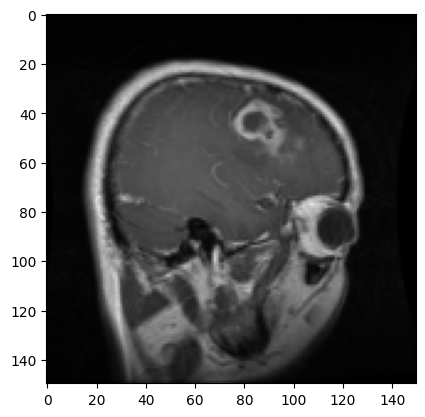

In [12]:
img, label = train_set[1000]
plt.imshow(img.permute(1,2,0))

In [13]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)

In [14]:
next(iter(val_loader))[0].shape

torch.Size([64, 3, 150, 150])

In [15]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.cnv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.cnv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.cnv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=0)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        self.leakyRelu = nn.LeakyReLU()
        self.fc1 = nn.Linear(128 * 5 * 5, 1024)
        self.fc2 = nn.Linear(1024, 4)

    def forward(self, x):
        out = self.leakyRelu(self.cnv1(x))
        out = self.maxpool1(out)

        out = self.leakyRelu(self.cnv2(out))
        out = self.maxpool2(out)

        out = self.leakyRelu(self.cnv3(out))
        out = self.maxpool3(out)

        out = self.leakyRelu(self.cnv4(out))
        out = self.maxpool4(out)

        out = out.view(out.size(0), -1)

        out = self.leakyRelu(self.fc1(out))
        out = self.fc2(out)

        return out

In [16]:
num_epochs = 10
model = CNNModel()
error = nn.CrossEntropyLoss()

lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

In [17]:
train_loss_list = []
val_loss_list = []
accuracy_list = []

for epoch in range(num_epochs):
  train_loss = 0
  val_loss = 0
  for i, (images, labels) in enumerate(train_loader):
    optimizer.zero_grad()
    outputs = model(images)
    loss = error(outputs, labels)
    train_loss+=loss.item()
    loss.backward()
    optimizer.step()
    print("Loss in Iteration:", i, ":", loss.item())
  total = 0
  correct = 0
  for images, labels in val_loader:
    outputs = model(images)
    v_loss = error(outputs, labels)
    val_loss+=v_loss.item()
    predicted = torch.max(outputs.data, 1)[1]

    total+=len(labels)
    correct+=(predicted==labels).sum()


  scheduler.step(val_loss/len(val_loader))
  accuracy = 100*correct/float(total)
  train_loss_list.append(train_loss/len(train_loader))
  val_loss_list.append(val_loss/len(val_loader))
  accuracy_list.append(accuracy)
  print("Epoch:{}  Loss:{}  Acciracy:{}%".format(epoch, train_loss/len(train_loader), accuracy))

Loss in Iteration: 0 : 1.3816522359848022
Loss in Iteration: 1 : 1.3042070865631104
Loss in Iteration: 2 : 1.2828295230865479
Loss in Iteration: 3 : 1.229601502418518
Loss in Iteration: 4 : 1.2935951948165894
Loss in Iteration: 5 : 1.2503212690353394
Loss in Iteration: 6 : 1.1310265064239502
Loss in Iteration: 7 : 1.3175339698791504
Loss in Iteration: 8 : 1.1115561723709106
Loss in Iteration: 9 : 1.1822295188903809
Loss in Iteration: 10 : 1.1383401155471802
Loss in Iteration: 11 : 1.127739429473877
Loss in Iteration: 12 : 1.0718721151351929
Loss in Iteration: 13 : 0.955165445804596
Loss in Iteration: 14 : 1.001440167427063
Loss in Iteration: 15 : 0.8507302403450012
Loss in Iteration: 16 : 1.0091923475265503
Loss in Iteration: 17 : 1.0922478437423706
Loss in Iteration: 18 : 1.1833206415176392
Loss in Iteration: 19 : 0.8241740465164185
Loss in Iteration: 20 : 1.0488218069076538
Loss in Iteration: 21 : 0.7876569628715515
Loss in Iteration: 22 : 0.9756126999855042
Loss in Iteration: 23 : 0

In [18]:
train_loss_list

[0.9163214071937229,
 0.5867934879185497,
 0.41342115315838135,
 0.3113294137992721,
 0.24567891684347304,
 0.16658661190582358,
 0.13415544474686403,
 0.11976893140893916,
 0.05810471007303483,
 0.038022048521678946]

In [19]:
val_loss_list

[1.0448469576381503,
 0.6268907118411291,
 0.5264005362987518,
 0.3928406536579132,
 0.3410450312353316,
 0.2539027915114448,
 0.1620426754511538,
 0.15405940938563573,
 0.11610846336753596,
 0.09550557627032201]

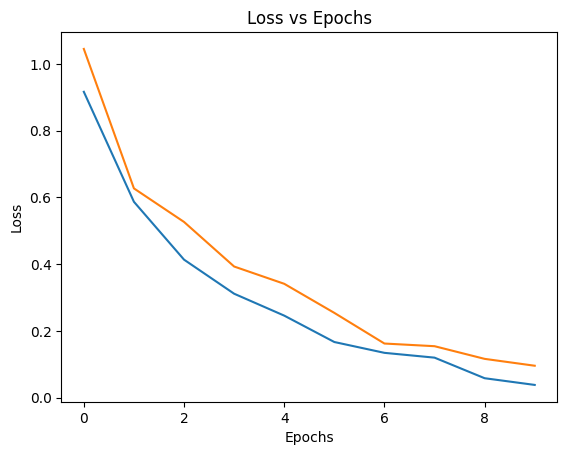

In [20]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.plot(range(num_epochs), train_loss_list)
plt.plot(range(num_epochs), val_loss_list)

In [21]:
accuracy_list

[tensor(57.6659),
 tensor(73.2265),
 tensor(78.4134),
 tensor(85.6598),
 tensor(87.7193),
 tensor(92.2197),
 tensor(94.2792),
 tensor(94.9657),
 tensor(95.8810),
 tensor(97.1777)]

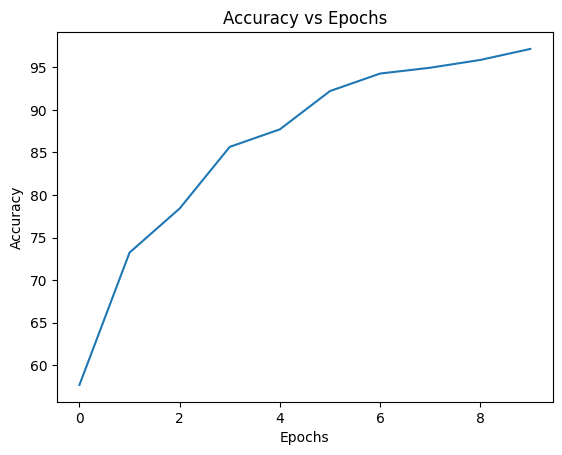

In [22]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.plot(range(num_epochs), accuracy_list)

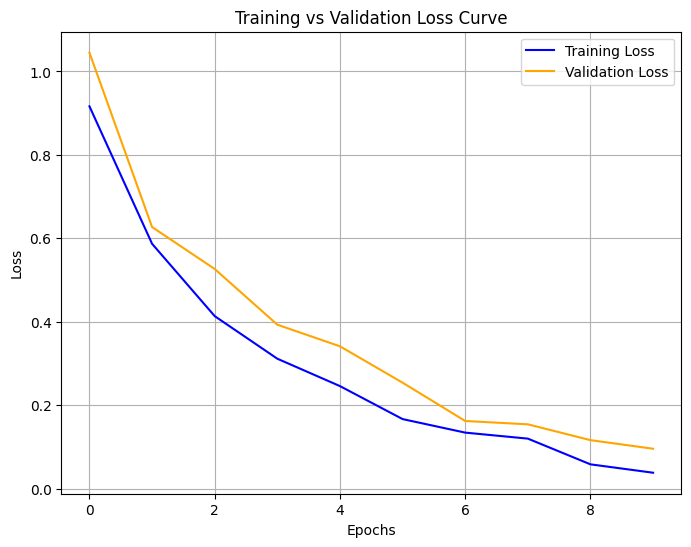

In [23]:
import matplotlib.pyplot as plt

epochs = range(len(train_loss_list))

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss_list, label='Training Loss', color='blue')
plt.plot(epochs, val_loss_list, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss Curve')
plt.legend()
plt.grid(True)
plt.savefig('loss_curve.png')
plt.show()


Classification Report:

              precision    recall  f1-score   support

      glioma       0.96      0.94      0.95       300
  meningioma       0.96      0.94      0.95       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.96      1.00      0.98       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



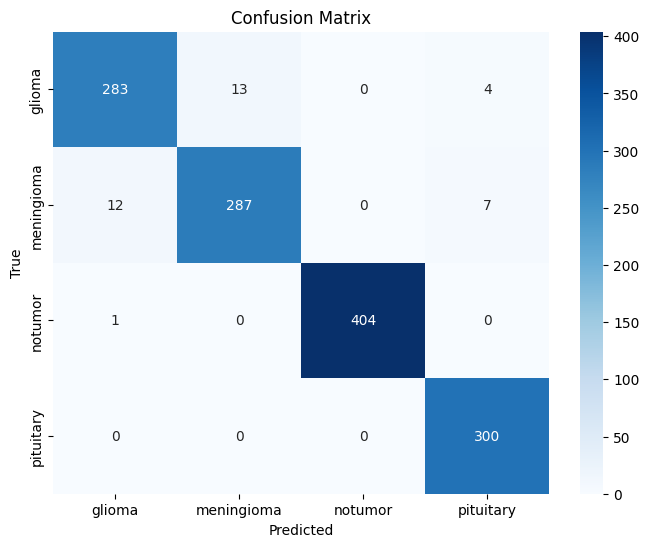

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # <- This is the missing line

model.eval()

true_labels = []
pred_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())

print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=val_set.classes))

cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_set.classes, yticklabels=val_set.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Classification Report:


Accuracy: 0.9718


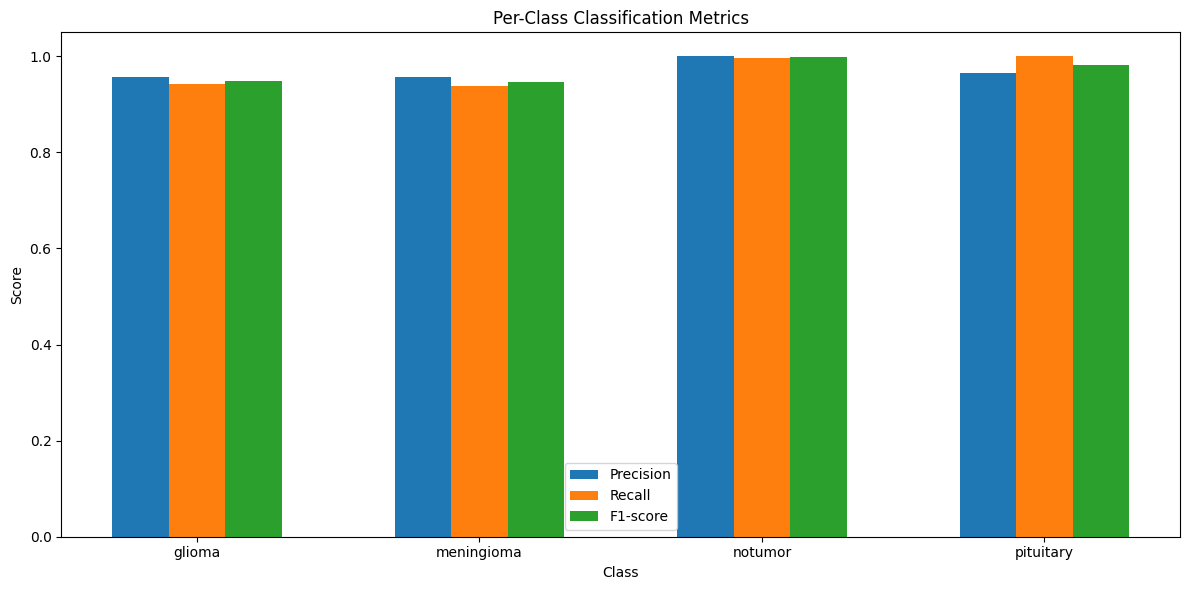

In [26]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import torch

model.eval()

true_labels = []
pred_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(preds.cpu().numpy())

print("Classification Report:\n")
report = classification_report(true_labels, pred_labels, target_names=val_set.classes, output_dict=True)

accuracy = np.mean(np.array(true_labels) == np.array(pred_labels))
print(f"\nAccuracy: {accuracy:.4f}")

class_labels = val_set.classes
precision = [report[label]["precision"] for label in class_labels]
recall = [report[label]["recall"] for label in class_labels]
f1_score = [report[label]["f1-score"] for label in class_labels]

x = np.arange(len(class_labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-score')

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Per-Class Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.set_ylim(0, 1.05)
ax.legend()

plt.tight_layout()
plt.show()


In [27]:
print(model)

CNNModel(
  (cnv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (leakyRelu): LeakyReLU(negative_slope=0.01)
  (fc1): Linear(in_features=3200, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=4, bias=True)
)


Text(0.5, 1.0, '0')

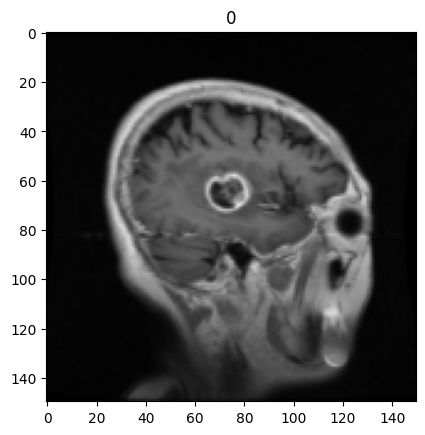

In [28]:
img, label = val_set[256]
plt.imshow(img.permute(1,2,0))
plt.title(label)

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

image = img.unsqueeze(0).to(device)

with torch.no_grad():
    output = model(image)

_, pred = torch.max(output, 1)
predicted_class = train_set.classes[pred.item()]

print("Predicted Output:", pred.item())
print("Predicted Class:", predicted_class)


Predicted Output: 0
Predicted Class: glioma
